In [40]:
#pip install NetworkX
import pandas as pd
import requests
import re
import networkx as nx

In [8]:
url = "http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270"
httpReq = requests.get(url)
ans = httpReq.text

ConnectTimeout: HTTPConnectionPool(host='www.ebi.ac.uk', port=80): Max retries exceeded with url: /Tools/webservices/psicquic/intact/webservices/current/search/query/pubid (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x0000021723E6C680>, 'Connection to www.ebi.ac.uk timed out. (connect timeout=None)'))

In [29]:
file = open('./tp-interactomics-MADP_2021_etu/pubid_17446270.txt','r')
ans=file.read()
print (ans)

uniprotkb:P0CW72	uniprotkb:P0CW72	intact:EBI-2620133|uniprotkb:Q777A5	intact:EBI-2620133|uniprotkb:Q777A5	psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)	psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)	psi-mi:"MI:0397"(two hybrid array)	Calderwood et al. (2007)	pubmed:17446270|imex:IM-20435|mint:MINT-6769080	taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")	taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")	psi-mi:"MI:0915"(physical association)	psi-mi:"MI:0469"(IntAct)	intact:EBI-2620961|imex:IM-20435-3	author score:+|intact-miscore:0.51
uniprotkb:P14348	uniprotkb:P0C704	intact:EBI-2620158|intact:EBI-9645437|uniprotkb:Q777G5	intact:EBI-2620975|uniprotkb:Q3KSQ5	psi-mi:scp_ebvb9(display_long)|uniprotkb:SCP(gene nam

In [30]:
def mitabReader(httpText):
    for line in ans.split("\n"):
        _ = line.split("\t")
        if len(_) > 1 and _[0].startswith("uniprotkb:")\
                      and _[1].startswith("uniprotkb:"):
            yield [ _[0].replace("uniprotkb:", ""),\
                    _[1].replace("uniprotkb:", "") ]\
                  + _[2:]
                
            
def isMitab_EBV_EBV(mitabArray):
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabArray[9]) and re.search(reEBV, mitabArray[10]):
        return True
    return False

def isMitab_Human_EBV(mitabLine):
    # Je ferai ça plus tard
    reSapiens="taxid:9606"
    if re.search(reSapiens,mitabLine[9]) or re.search(reSapiens,mitabLine[10]) :
        return True
    return False


EBV_EBV_mitab   = []
EBV_Human_mitab = []
total = 0
for mitabArray in mitabReader(ans):
    total += 1
    if isMitab_EBV_EBV(mitabArray):
        EBV_EBV_mitab.append(mitabArray)
    elif isMitab_Human_EBV(mitabArray):
        EBV_Human_mitab.append(mitabArray)
    else : 
        raise ValueError("Je ne connais pas cette espece ==> ", mitabArray[9:11])

print(f"Nombre total d'interactions {total}, EBV-EBV {len(EBV_EBV_mitab)}")

Nombre total d'interactions 230, EBV-EBV 59


In [34]:
print(EBV_EBV_mitab[0])
print("\n")
print(EBV_Human_mitab[0])

['P0CW72', 'P0CW72', 'intact:EBI-2620133|uniprotkb:Q777A5', 'intact:EBI-2620133|uniprotkb:Q777A5', 'psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)', 'psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)', 'psi-mi:"MI:0397"(two hybrid array)', 'Calderwood et al. (2007)', 'pubmed:17446270|imex:IM-20435|mint:MINT-6769080', 'taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")', 'taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")', 'psi-mi:"MI:0915"(physical association)', 'psi-mi:"MI:0469"(IntAct)', 'intact:EBI-2620961|imex:IM-20435-3', 'author score:+|intact-miscore:0.51']


['Q3KSN9', 'Q15723', 'intact:EBI-2621948', 'intact:EBI-956941|uniprotkb:E9PCX3|uniprotkb:Q15724|uniprotkb:Q15725|uniprotkb:Q6P1K5|ensembl:ENSP00000368

In [38]:
EBV_proteins= set()
for mitab in EBV_EBV_mitab :
    EBV_proteins.add(mitab[0])# colonne de la première proteine de l'interaction
    EBV_proteins.add(mitab[1])# colonne de la seconde proteine de l'interaction

EBV_Human= set()
for mitab in EBV_Human_mitab :
    if "taxid:9606" in mitab[9] :
        EBV_Human.add(mitab[0])
        EBV_proteins.add(mitab[1])
    else :
        EBV_Human.add(mitab[1])
        EBV_proteins.add(mitab[0])
print("nb Proteines dans EBV_Human :"+str(len(EBV_Human)))
print("nb Proteines dans EBV_EBV :"+str(len(EBV_proteins)))

nb Proteines dans EBV_Human :113
nb Proteines dans EBV_EBV :64


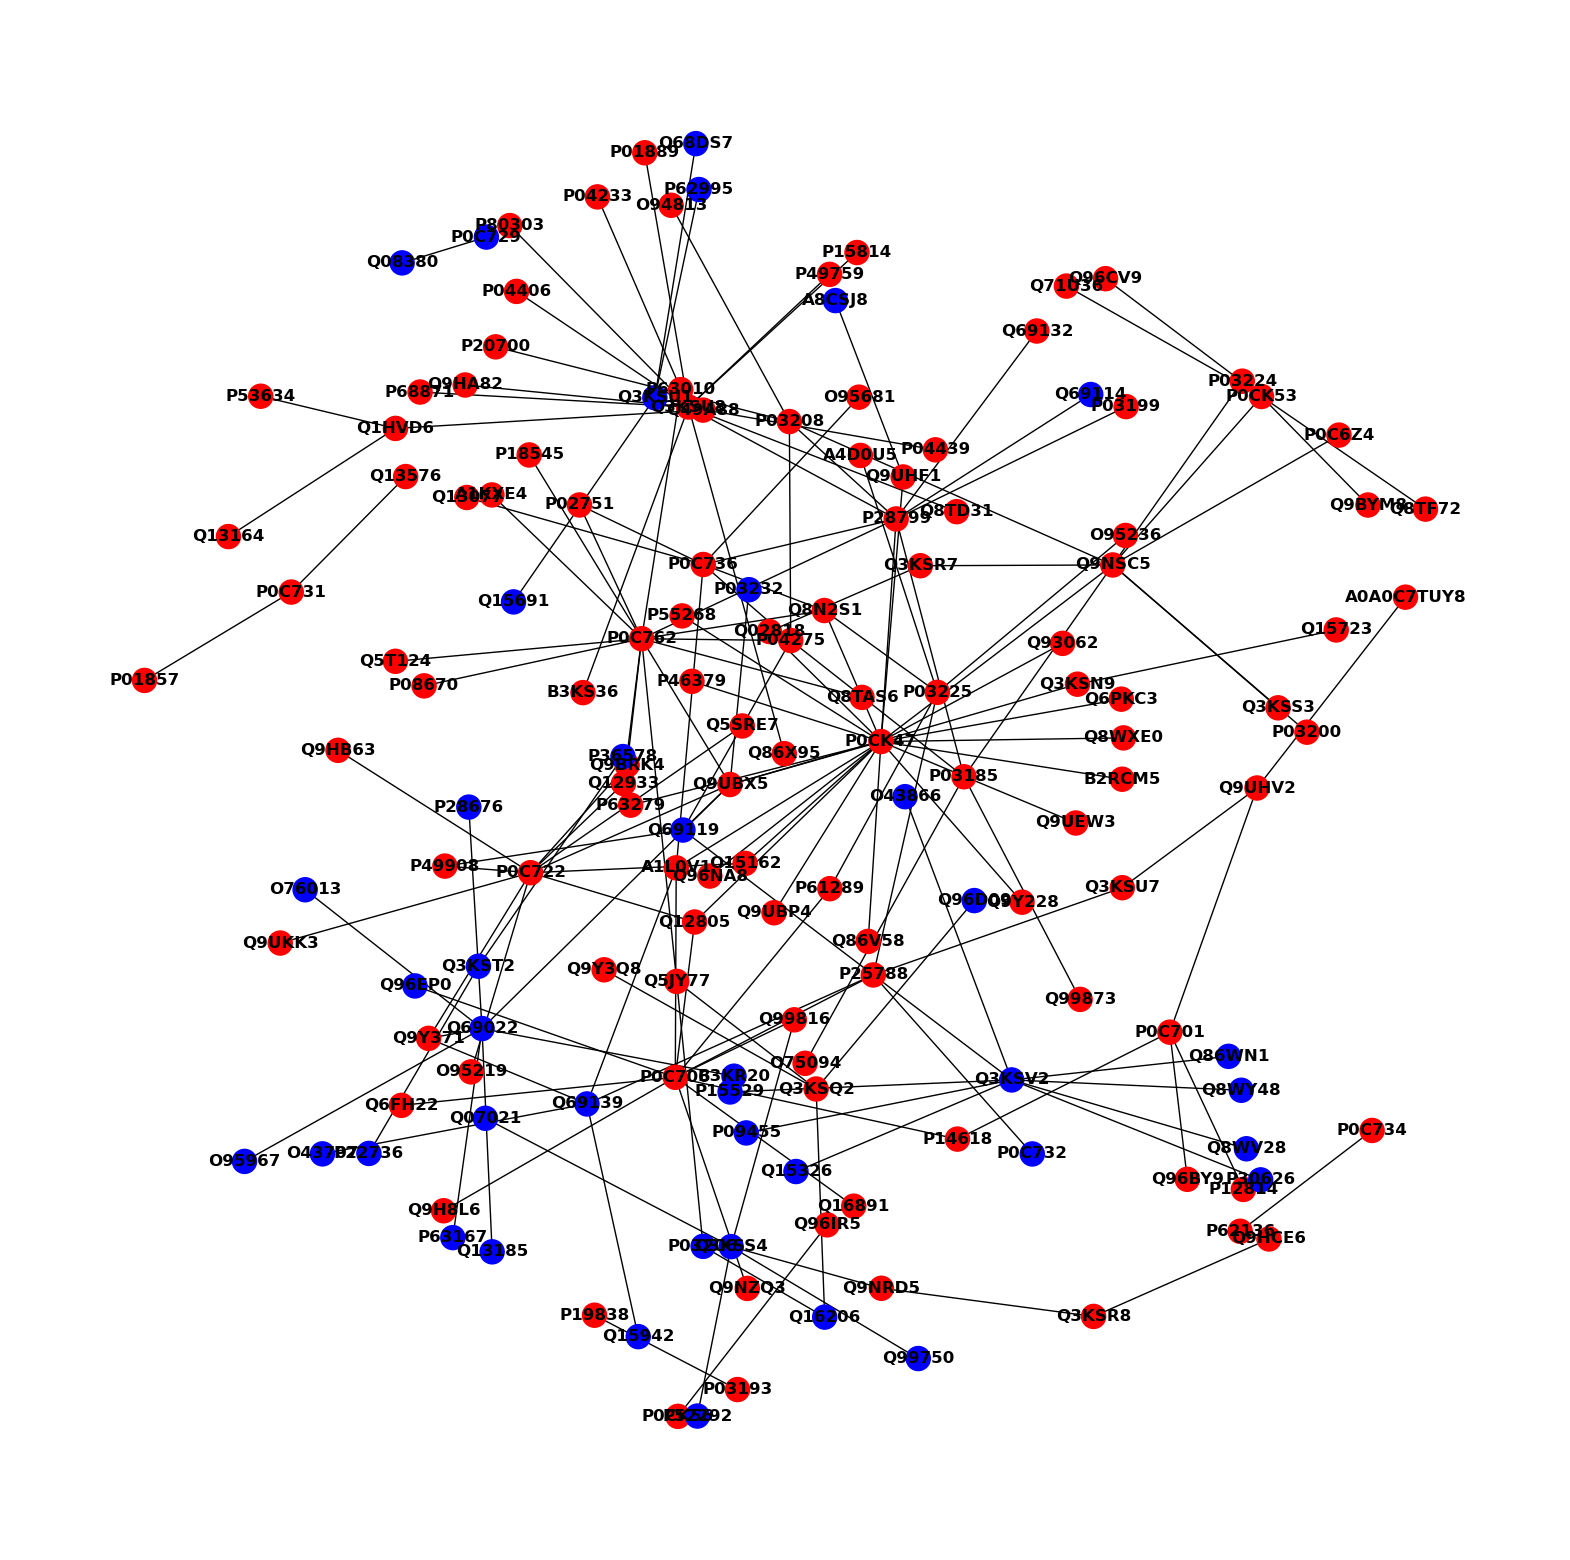

In [82]:
from matplotlib import pyplot as plt

G=nx.Graph()
#for mitab in EBV_EBV_mitab :
    #G.add_edge(mitab[0],mitab[1])
for mitab in EBV_Human_mitab :
    G.add_edge(mitab[0],mitab[1])
listColor=["blue"]*len(G.nodes())
i=0
for prot in G.nodes(): 
    if prot in EBV_Human :
        listColor[i]="red"
        i+=1
#G.add_edge_from

fig,host_ax=plt.subplots(figsize=(20,20))
host_ax.set_axis_off

nx.draw(G, pos=nx.spring_layout(G,k=0.3),with_labels=True, font_weight='bold',ax=host_ax,node_color=listColor)
